In [1]:
import seaborn as sns
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from adjustText import adjust_text
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


df_DA_US = df[(df['job_title_short']=='Data Analyst')& (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])


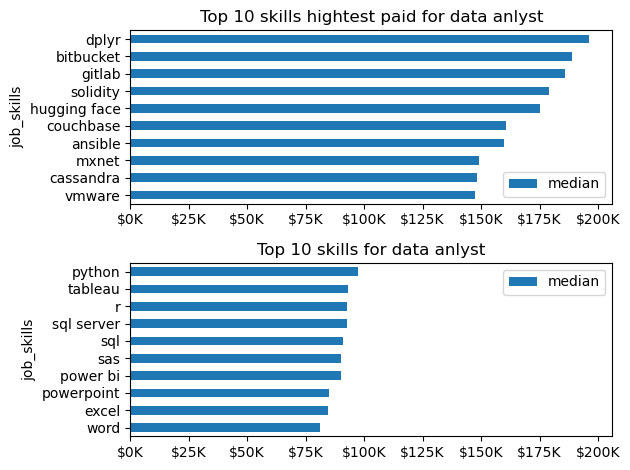

In [3]:
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg','job_skills']]


df_DA_US_groupby=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])


df_DA_US_top = df_DA_US_groupby.sort_values(by='median', ascending = False).head(10)

df_DA_US_topskills = df_DA_US_groupby.sort_values(by='count', ascending = False).head(10).sort_values(by='median', ascending = False)

fig, ax = plt.subplots(2,1)

df_DA_US_top.plot(kind = 'barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


df_DA_US_topskills[::-1].plot(kind= 'barh', y='median', ax=ax[1])
#ax[1].invert_yaxis()
#ax= ax.gca()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 skills hightest paid for data anlyst')
ax[1].set_title('Top 10 skills for data anlyst')

plt.tight_layout()
#plt.xlim(0, 200000)

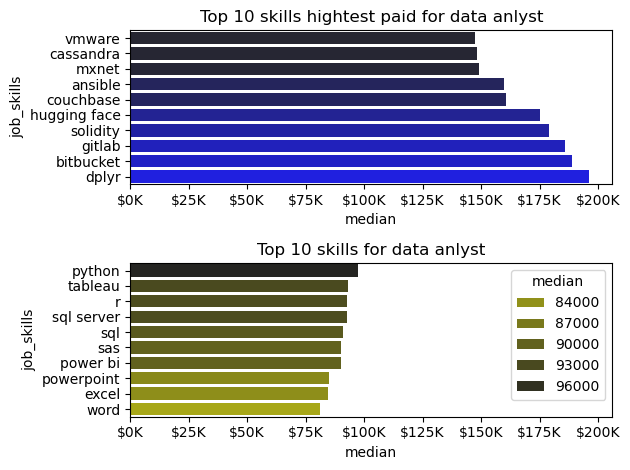

In [9]:
fig, ax = plt.subplots(2,1)

#df_DA_US_top.plot(kind = 'barh', y='median', ax=ax[0])
sns.barplot(data = df_DA_US_top, x='median', y= df_DA_US_top.index, ax = ax[0], hue='median', palette='dark:b')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


#df_DA_US_topskills[::-1].plot(kind= 'barh', y='median', ax=ax[1])
sns.barplot(data = df_DA_US_topskills, x='median', y= df_DA_US_topskills.index, ax = ax[1], hue='median', palette='dark:y_r')
#ax[1].invert_yaxis()
#ax= ax.gca()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
ax[0].set_title('Top 10 skills hightest paid for data anlyst')
ax[1].set_title('Top 10 skills for data anlyst')

plt.tight_layout()
#plt.xlim(0, 200000)

Text(0, 0.5, 'number of jobs')

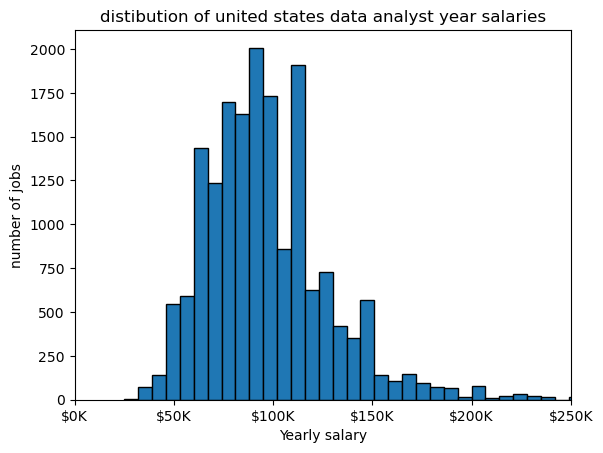

In [10]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 50, edgecolor = 'black')
plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('distibution of united states data analyst year salaries')
plt.xlabel('Yearly salary')
plt.ylabel('number of jobs')

Text(0, 0.5, 'number of jobs')

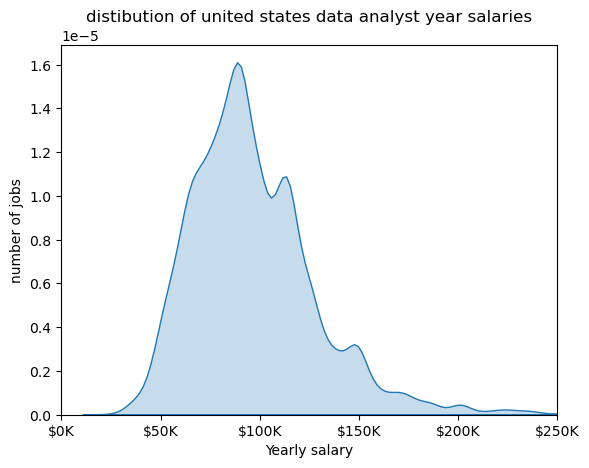

In [15]:
sns.kdeplot(df_DA_US['salary_year_avg'], fill = True)
plt.xlim(0, 250000)

ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('distibution of united states data analyst year salaries')
plt.xlabel('Yearly salary')
plt.ylabel('number of jobs')

/var/folders/tm/n04439ts2c1gj_0tqdrrz6jr0000gn/T/ipykernel_72513/4007717035.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=jobtitles, vert=False)


(0.0, 600000.0)

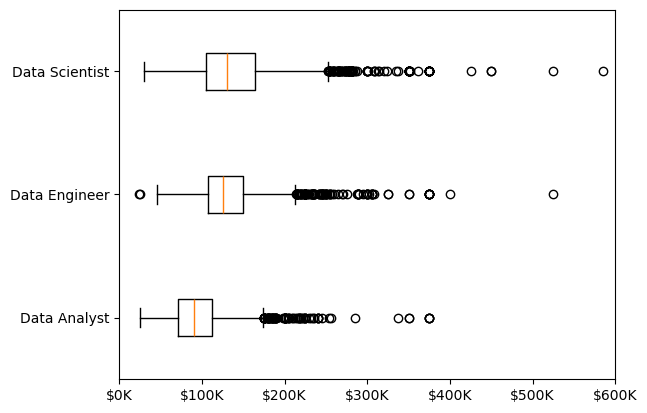

In [17]:
jobtitles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(jobtitles)) & (df['job_country']=='United States')].copy()

df_US = df_US.dropna(subset = ['salary_year_avg'])


job_list = [df_US[df_US['job_title_short']==jobtitle]['salary_year_avg'] for jobtitle in jobtitles]

plt.boxplot(job_list, labels=jobtitles, vert=False)
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)

(0.0, 600000.0)

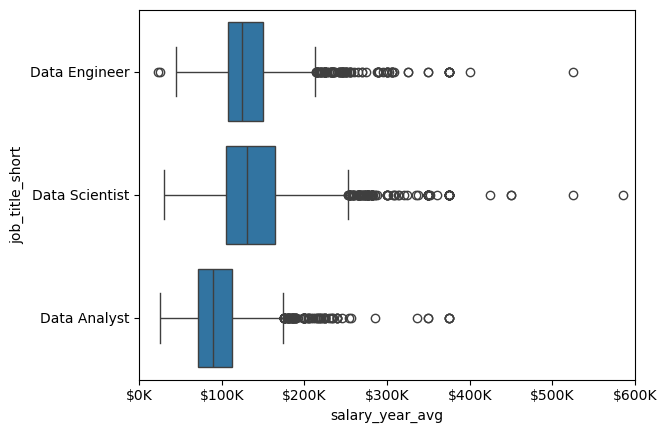

In [20]:
sns.boxplot(data = df_US, x= 'salary_year_avg', y='job_title_short')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlim(0, 600000)